<a href="https://colab.research.google.com/github/SenaKymk/pupilica_ai_bootcamp_assignment/blob/main/pupilica_olimpiyatVeriAnalizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# pythonda uyarıları kapatır
import warnings
warnings.filterwarnings("ignore")

In [35]:
# veriyi içe aktar
veri = pd.read_csv("/content/olimpiyatlar_temizlenmis.csv")
veri.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
3,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
4,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


Çok Değişkenli veri analizi


In [36]:
veri_pivot = veri.pivot_table(index="madalya", columns = "cinsiyet",
                 values=["boy","kilo","yas"],
                aggfunc={"boy":np.mean,"kilo":np.mean,"yas":[min, max, np.std]})
veri_pivot.head()

boy                   kilo              yas              \
                mean                   mean              max         min   
cinsiyet           F           M          F          M     F     M     F   
madalya                                                                    
Bronze    170.003227  180.045806  62.757125  77.841504  69.0  72.0  12.0   
Gold      170.448727  180.318906  63.199349  78.186505  63.0  64.0  13.0   
Silver    170.233783  180.053626  62.866892  77.960887  55.0  73.0  11.0   

                                    
                     std            
cinsiyet     M         F         M  
madalya                             
Bronze    10.0  5.329229  5.870340  
Gold      13.0  5.219615  5.987807  
Silver    13.0  5.253111  6.098221

Anamoli Tespiti

In [37]:
def anomaliTespiti(df,ozellik):
    outlier_indices = []

    for c in ozellik:
        # 1. çeyrek
        Q1 = np.percentile(df[c],25)
        # 3. çeyrek
        Q3 = np.percentile(df[c],75)
        # IQR: Çeyrekler açıklığı
        IQR = Q3 - Q1
        # aykırı tespiti için çarpan
        outlier_step = IQR * 1.5
        # aykırıyı ve aykırı indeksini tespit et
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # indeksleri depola
        outlier_indices.extend(outlier_list_col)

    # eşsiz aykırı değerleri bul
    outlier_indices = Counter(outlier_indices)
    # eğer bir örnek (v) 1 farklı sütun için aykırı değerse bunu aykırı olarak kabul et (v>1)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1)

    return multiple_outliers

In [38]:
veri_anamoli = veri.loc[anomaliTespiti(veri,["yas","kilo","boy"])]
veri_anamoli.spor.value_counts()

,count
spor,
Basketball,64
Gymnastics,34
Handball,6
Athletics,5
Sailing,3
Diving,3
Shooting,1
Figure Skating,1
Wrestling,1


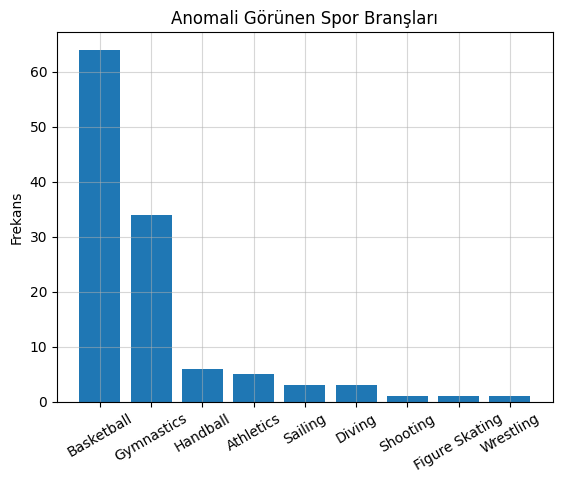

In [39]:
plt.figure()
plt.bar(veri_anamoli.spor.value_counts().index,veri_anamoli.spor.value_counts().values)
plt.xticks(rotation = 30)
plt.title("Anomali Görünen Spor Branşları")
plt.ylabel("Frekans")
plt.grid(True,alpha = 0.5)
plt.show()

In [40]:
veri_gym = veri_anamoli[veri_anamoli.spor == "Gymnastics"]
veri_gym

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
1736,Oana Mihaela Ban,F,18.0,139.0,36.0,Romania,ROU,2004,Summer,Athina,Gymnastics,Gymnastics Women's Team All-Around,Gold
2802,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Uneven Bars,Silver
3187,Loredana Boboc,F,16.0,139.0,32.0,Romania,ROU,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Gold
6486,Laura Cutina,F,15.0,143.0,36.0,Romania,ROU,1984,Summer,Los Angeles,Gymnastics,Gymnastics Women's Team All-Around,Gold
7311,Deng Linlin,F,16.0,144.0,34.0,China,CHN,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,Gold
7312,Deng Linlin,F,20.0,144.0,34.0,China,CHN,2012,Summer,London,Gymnastics,Gymnastics Women's Balance Beam,Gold
9561,Mariya Yevgenyevna Filatova (-Kurbatova),F,14.0,136.0,30.0,Soviet Union,URS,1976,Summer,Montreal,Gymnastics,Gymnastics Women's Team All-Around,Gold
9562,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Team All-Around,Gold
9563,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Uneven Bars,Bronze
11245,Maxi Gnauck,F,15.0,148.0,33.0,East Germany,GDR,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,Silver


In [41]:
veri_gym.etkinlik.value_counts()

,count
etkinlik,
Gymnastics Women's Team All-Around,21
Gymnastics Women's Uneven Bars,6
Gymnastics Women's Balance Beam,3
Gymnastics Women's Floor Exercise,2
Gymnastics Women's Individual All-Around,1
Gymnastics Women's Horse Vault,1


In [42]:
veri_basket = veri_anamoli[veri_anamoli.spor == "Basketball"]
veri_basket

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
1086,Franjo Arapovi,M,23.0,211.0,120.0,Yugoslavia,YUG,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Silver
1087,Franjo Arapovi,M,27.0,211.0,120.0,Croatia,CRO,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Silver
2848,Oleksandr Mykhailovych Bielostienniy,M,21.0,214.0,117.0,Soviet Union,URS,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Bronze
2849,Oleksandr Mykhailovych Bielostienniy,M,29.0,214.0,117.0,Soviet Union,URS,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
3465,"Carlos Austin Boozer, Jr.",M,22.0,206.0,117.0,United States,USA,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39644,Rajko ii,M,21.0,210.0,110.0,Yugoslavia,YUG,1976,Summer,Montreal,Basketball,Basketball Men's Basketball,Silver
39645,Rajko ii,M,25.0,210.0,110.0,Yugoslavia,YUG,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Gold
39646,Rajko ii,M,29.0,210.0,110.0,Yugoslavia,YUG,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Bronze
39736,Eurelijus ukauskas,M,22.0,218.0,115.0,Lithuania,LTU,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,Bronze


In [43]:
veri_basket.etkinlik.value_counts()

,count
etkinlik,
Basketball Men's Basketball,62
Basketball Women's Basketball,2


In [55]:
veri_zaman = veri.copy() # verinin orjinali bozulmasın diye kopyalayalım
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [56]:
essiz_yillar = veri_zaman.yil.unique()
essiz_yillar

array([1900, 1920, 2014, 1948, 1952, 1992, 1994, 2002, 2006, 2008, 1988,
       1996, 1960, 1912, 1956, 2016, 2012, 2000, 2004, 1980, 1984, 1936,
       1906, 1964, 1972, 1924, 1904, 1932, 1928, 1968, 1976, 2010, 1908,
       1998, 1896])

In [57]:
# yılları küçükten büyüğe sıralayalım
dizili_array = np.sort(veri_zaman.yil.unique())
dizili_array

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016])

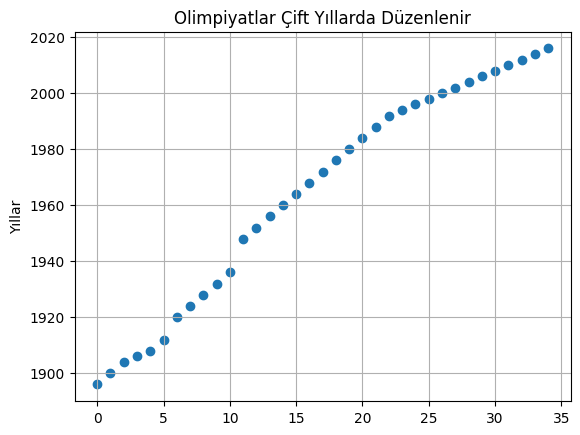

In [58]:
plt.figure()
plt.scatter(range(len(dizili_array)),dizili_array)
plt.grid(True)
plt.ylabel("Yıllar")
plt.title("Olimpiyatlar Çift Yıllarda Düzenlenir")
plt.show()


In [59]:
# veri içerisinde buluna yılları datetime veri tipine dönüştürelim
tarih_saat_nesnesi = pd.to_datetime(veri_zaman['yil'], format='%Y')
print(type(tarih_saat_nesnesi))
tarih_saat_nesnesi.head(3)

<class 'pandas.core.series.Series'>


,yil
0,1900-01-01
1,1920-01-01
2,1920-01-01


In [60]:
veri_zaman["tarih_saat"] = tarih_saat_nesnesi
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya,tarih_saat
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
2,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01


In [61]:
# tarih_saat sütununda bulunan datetime veri tipine ait veriyi, asıl verinin indeksi yapalım
# pandas kütüphanesinde indeksi datetime veri tipi olan veri setleri ile çalışmak için özel yapılar bulunmaktadır.
# bu nedenle amacımız olan indeksi datetime veri tipi yapma çalışmamzız gerçekleşmiş oluyor.
veri_zaman = veri_zaman.set_index("tarih_saat")
veri_zaman.drop(["yil"],axis = 1,inplace= True)
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya
tarih_saat,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [62]:
print(veri_zaman.index)  # Eğer index datetime değilse hata alırsın


DatetimeIndex(['1900-01-01', '1920-01-01', '1920-01-01', '2014-01-01',
               '1948-01-01', '1948-01-01', '1948-01-01', '1948-01-01',
               '1952-01-01', '1992-01-01',
               ...
               '1996-01-01', '1980-01-01', '1992-01-01', '1996-01-01',
               '1952-01-01', '1956-01-01', '1964-01-01', '1980-01-01',
               '2000-01-01', '2004-01-01'],
              dtype='datetime64[ns]', name='tarih_saat', length=39783, freq=None)


In [63]:
print("Sütunlar:", veri_zaman.columns)


Sütunlar: Index(['isim', 'cinsiyet', 'yas', 'boy', 'kilo', 'takim', 'uok', 'sezon',
       'sehir', 'spor', 'etkinlik', 'madalya'],
      dtype='object')


In [73]:
veri_sayisal = veri_zaman.select_dtypes(include=["number"])  # Sadece sayısal sütunları al
periyodik_veri = veri_sayisal.resample("2AS").mean()  # 2 yıllık periyotlarla ortalama hesapla
periyodik_veri.head()


,yas,boy,kilo
tarih_saat,,,
1896-01-01,23.905734,174.280350,72.734056
1898-01-01,NaN,NaN,NaN
1900-01-01,27.786689,177.882301,74.979950
1902-01-01,NaN,NaN,NaN
1904-01-01,26.363868,177.241091,74.330823


In [74]:
# kayıp verileri çıkart
periyodik_veri.dropna(axis=0,inplace = True)
periyodik_veri.head()

,yas,boy,kilo
tarih_saat,,,
1896-01-01,23.905734,174.280350,72.734056
1900-01-01,27.786689,177.882301,74.979950
1904-01-01,26.363868,177.241091,74.330823
1906-01-01,26.479389,176.347576,74.072183
1908-01-01,27.566739,176.662419,73.721107


<Figure size 640x480 with 0 Axes>

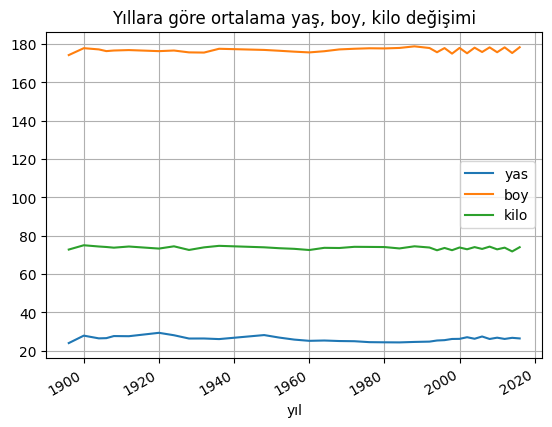

In [75]:
plt.figure()
periyodik_veri.plot()
plt.title("Yıllara göre ortalama yaş, boy, kilo değişimi")
plt.xlabel("yıl")
plt.grid(True)
plt.show()

In [76]:
veri_zaman = pd.get_dummies(veri_zaman, columns=['madalya'])
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,False,True,False
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,True,False,False
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,True,False,False


In [77]:
periyodik_veri = veri_zaman.resample("2A").sum() # 2 yıllık periyotlar halinde ortalama değerleri al
periyodik_veri.head()

# kayıp verileri çıkart
periyodik_veri = periyodik_veri[~(periyodik_veri == 0).any(axis=1)]
periyodik_veri.tail()

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
2008-12-31,Ragnhild Margrethe AamodtJos Luis Abajo GmezMa...,FMFMMMMFMFFMFMMFMMFFMMFMFFMMMMMMMMMMMFMFMMMMFF...,53344.0,365157.91,152090.92,NorwaySpainRussiaBelarusFranceFranceAustraliaU...,NORESPRUSBLRFRAFRAAUSUSATJKTURRUSFRAROUARGCUBN...,SummerSummerSummerSummerSummerSummerSummerSumm...,BeijingBeijingBeijingBeijingBeijingBeijingBeij...,HandballFencingAthleticsCanoeingHandballHandba...,"Handball Women's HandballFencing Men's epee, I...",710,671,667
2010-12-31,"Richard ""Richy"" AdjeiMeghan Christina Agosta ...",MFMMMMFFFFMMFFMFMMMFFFFFMFMFMFFMMFFFFFMMMFFFMM...,13896.0,91395.00,37877.12,Germany-2CanadaSwitzerlandSwitzerlandCanadaGer...,GERCANSUISUICANGERGERFRACANJPNUSAFINUSAFRANORC...,WinterWinterWinterWinterWinterWinterWinterWint...,VancouverVancouverVancouverVancouverVancouverV...,BobsleighIce HockeySki JumpingSki JumpingSnowb...,Bobsleigh Men's TwoIce Hockey Women's Ice Hock...,171,174,175
2012-12-31,Luc AbaloJennifer AbelDenis Mikhaylovich Ablya...,MFMMMMFFFMFFFMMMFFMMMFMMMFMMMMFMFFMMMMFMMMFMFM...,50595.0,346091.47,143102.94,FranceCanadaRussiaRussiaEgyptFranceNetherlands...,FRACANRUSRUSEGYFRANEDGBRNZLGERBRAGBRGBRUSAUSAU...,SummerSummerSummerSummerSummerSummerSummerSumm...,LondonLondonLondonLondonLondonLondonLondonLond...,HandballDivingGymnasticsGymnasticsFencingHandb...,Handball Men's HandballDiving Women's Synchron...,679,632,630
2014-12-31,Juhamatti Tapio AaltonenJeremy AbbottVictoria ...,MMFFMFMMMMMFMMMFMMMMMMMFMFFFFFMMMMFMMMFFFMMMMF...,15907.0,104686.00,42838.63,FinlandUnited StatesGreat BritainCanadaSwedenS...,FINUSAGBRCANSWESUIUSARUSRUSRUSRUSUSAGBRUSARUSC...,WinterWinterWinterWinterWinterWinterWinterWint...,SochiSochiSochiSochiSochiSochiSochiSochiSochiS...,Ice HockeyFigure SkatingCurlingIce HockeyIce H...,Ice Hockey Men's Ice HockeyFigure Skating Mixe...,198,202,197
2016-12-31,Giovanni AbagnalePatimat AbakarovaLuc AbaloSae...,MFMMMMMMMMFFFFMMMMMMFFFMMMFMMMMMFFMFMMFMMMFMFM...,53256.0,360846.03,149628.71,ItalyAzerbaijanFranceIranRussiaRussiaRussiaAus...,ITAAZEFRAIRIRUSRUSRUSAUSESPJORNEDGBRUSANZLUSAU...,SummerSummerSummerSummerSummerSummerSummerSumm...,Rio de JaneiroRio de JaneiroRio de JaneiroRio ...,RowingTaekwondoHandballWrestlingGymnasticsGymn...,Rowing Men's Coxless PairsTaekwondo Women's Fl...,703,665,655


<Figure size 640x480 with 0 Axes>

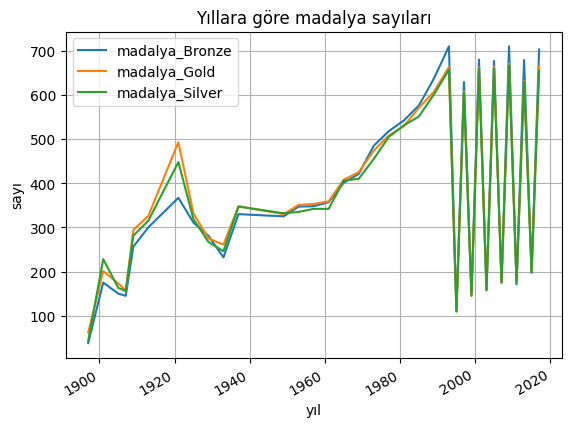

In [78]:
plt.figure()
periyodik_veri.loc[:,["madalya_Bronze", "madalya_Gold", "madalya_Silver"]].plot()
plt.title("Yıllara göre madalya sayıları")
plt.ylabel("sayı")
plt.xlabel("yıl")
plt.grid(True)
plt.show()

In [79]:
# veriyi yaz ve kış olmak üzere 2 ye ayıralım
yaz = veri_zaman[veri_zaman.sezon == "Summer"]
kis = veri_zaman[veri_zaman.sezon == "Winter"]
kis.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,True,False,False
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,False,True,False
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,True,False,False


In [80]:
periyodik_veri_kis = kis.resample("A").sum() # 2 yıllık periyotlar halinde ortalama değerleri al

# kayıp verileri çıkart
periyodik_veri_kis = periyodik_veri_kis[~(periyodik_veri_kis == 0).any(axis=1)]
periyodik_veri_kis.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
1924-12-31,Clarence John AbelJohan Petter hln (Andersson-...,MMMMMMMMMMMMMMMFMMMMMMMMMMMMFMMMMMMMMMMMMMMMMM...,3919.60,22867.28,9703.58,United StatesSwedenGreat BritainFranceGreat Br...,USASWEGBRFRAGBRSUIAUTFRAAUTNORFINGBRGBRGBRFRAF...,WinterWinterWinterWinterWinterWinterWinterWint...,ChamonixChamonixChamonixChamonixChamonixChamon...,Ice HockeyCurlingIce HockeyCurlingBobsleighMil...,Ice Hockey Men's Ice HockeyCurling Men's Curli...,37,55,38
1928-12-31,Karl Gustaf Emanuel AbrahamssonAlf Steen Ander...,MMMMMMMMMMMFFFMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMM...,2265.56,15745.75,6862.50,SwedenNorwaySwedenSwitzerlandSwitzerlandNorway...,SWENORSWESUISUINORNORSWEAUTSUIFRAFRAAUTAUTTCHC...,WinterWinterWinterWinterWinterWinterWinterWint...,Sankt MoritzSankt MoritzSankt MoritzSankt Mori...,Ice HockeySki JumpingCross Country SkiingIce H...,Ice Hockey Men's Ice HockeySki Jumping Men's N...,31,30,28
1932-12-31,"Osborne ""Ty"" AndersonSherwin Campbell BadgerRu...",MMMMMMMFMFMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMM...,2431.00,16357.71,7067.76,United StatesUnited States-1GermanyNorwayNorwa...,USAUSAGERNORNORUSAFRAFRAUSAAUTSUIUSACANUSACANC...,WinterWinterWinterWinterWinterWinterWinterWint...,Lake PlacidLake PlacidLake PlacidLake PlacidLa...,Ice HockeyFigure SkatingIce HockeySpeed Skatin...,Ice Hockey Men's Ice HockeyFigure Skating Mixe...,28,32,32
1936-12-31,Hans Aichelemile AllaisReidar AndersenAlexande...,MMMMMMMMMMMMMMMMMMMMMMMMFMFMMMMMMMMMMMMMMMFMMM...,2742.00,19123.20,8101.88,Switzerland-1FranceNorwayGreat BritainGermanyG...,SUIFRANORGBRGERGERNORNORNORNORSUISUISWEGBRSUIG...,WinterWinterWinterWinterWinterWinterWinterWint...,Garmisch-PartenkirchenGarmisch-PartenkirchenGa...,BobsleighAlpine SkiingSki JumpingIce HockeyFig...,Bobsleigh Men's FourAlpine Skiing Men's Combin...,35,36,37
1948-12-31,Jeannette Eleanor Altwegg (-Wirz)Hans Bnninger...,FMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFFMMMMMMM...,3643.00,23942.51,10375.92,Great BritainSwitzerlandUnited StatesBelgiumIt...,GBRSUIUSABELITAUSASUISUITCHTCHUSANORUSASUISUIF...,WinterWinterWinterWinterWinterWinterWinterWint...,Sankt MoritzSankt MoritzSankt MoritzSankt Mori...,Figure SkatingIce HockeySpeed SkatingFigure Sk...,Figure Skating Women's SinglesIce Hockey Men's...,46,41,48


In [81]:
# yaz için
periyodik_veri_yaz = yaz.resample("A").sum() # 2 yıllık periyotlar halinde ortalama değerleri al

# kayıp verileri çıkart
periyodik_veri_yaz = periyodik_veri_yaz[~(periyodik_veri_yaz == 0).any(axis=1)]
periyodik_veri_yaz.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
1896-12-31,Ioannis AndreouNikolaos AndriakopoulosEdward B...,MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,3418.52,24922.09,10400.97,GreeceGreeceGreat BritainUnited StatesGermanyG...,GREGREGBRUSAGERGERGBRGBRUSAUSAFRAGREGREUSAUSAU...,SummerSummerSummerSummerSummerSummerSummerSumm...,AthinaAthinaAthinaAthinaAthinaAthinaAthinaAthi...,SwimmingGymnasticsCyclingAthleticsGymnasticsGy...,"Swimming Men's 1,200 metres FreestyleGymnastic...",38,62,43
1900-12-31,Edgar Lindenau AabyeMargaret Ives Abbott (-Dun...,MFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,16783.16,107440.91,45287.89,Denmark/SwedenUnited StatesVesper Boat ClubUni...,DENUSAUSAFRAFRAFRAFRAFRAGERGERNORGBRFRAGBRFRAF...,SummerSummerSummerSummerSummerSummerSummerSumm...,ParisParisParisParisParisParisParisParisParisP...,Tug-Of-WarGolfRowingRugbyRugbySailingSailingFo...,Tug-Of-War Men's Tug-Of-WarGolf Women's Indivi...,175,201,228
1904-12-31,"Louis Grenville ""Lou"" AbellEdgar Holmes AdamsA...",MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,12812.84,86139.17,36124.78,Vesper Boat ClubUnited StatesMohawk Indians-2M...,USAUSACANUSAUSAUSAUSAUSACANUSAUSAUSAUSAUSAUSAU...,SummerSummerSummerSummerSummerSummerSummerSumm...,St. LouisSt. LouisSt. LouisSt. LouisSt. LouisS...,RowingSwimmingLacrosseRowingCyclingCyclingRowi...,Rowing Men's Coxed EightsSwimming Men's Plunge...,150,173,163
1906-12-31,"George ""Ioannis"" AbbotIoannis AgrimisGeorgios ...",MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,12127.56,80767.19,33925.06,"Thessalonki-1Large boat, Central Naval Prep Sc...",GREGREGREDENDENNORDENGERGERGREGREFRAFRAAUSAUSA...,SummerSummerSummerSummerSummerSummerSummerSumm...,AthinaAthinaAthinaAthinaAthinaAthinaAthinaAthi...,FootballRowingGymnasticsFootballGymnasticsGymn...,Football Men's FootballRowing Men's 17-Man Nav...,145,157,156
1908-12-31,Anna Mrtha Vilhelmina Adlerstrhle (von Oelreic...,FMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,22907.96,146806.47,61262.24,SwedenGreat BritainGreat BritainFranceFranceIr...,SWEGBRGBRFRAFRAGBRGBRGBRGBRNORDENNORDENCANSWES...,SummerSummerSummerSummerSummerSummerSummerSumm...,LondonLondonLondonLondonLondonLondonLondonLond...,TennisAthleticsLacrosseFencingFencingHockeySho...,"Tennis Women's Singles, Covered CourtsAthletic...",256,294,281


<Figure size 640x480 with 0 Axes>

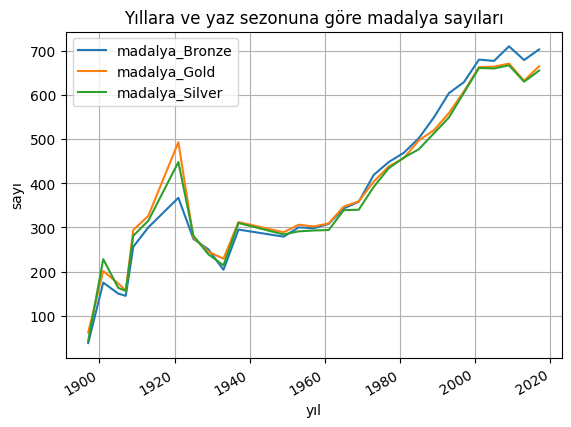

<Figure size 640x480 with 0 Axes>

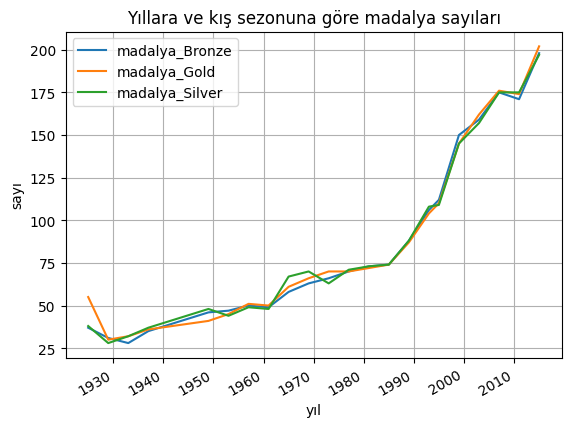

In [82]:
plt.figure()
periyodik_veri_yaz.loc[:,["madalya_Bronze", "madalya_Gold", "madalya_Silver"]].plot()
plt.title("Yıllara ve yaz sezonuna göre madalya sayıları")
plt.ylabel("sayı")
plt.xlabel("yıl")
plt.grid(True)
plt.show()

plt.figure()
periyodik_veri_kis.loc[:,["madalya_Bronze", "madalya_Gold", "madalya_Silver"]].plot()
plt.title("Yıllara ve kış sezonuna göre madalya sayıları")
plt.ylabel("sayı")
plt.xlabel("yıl")
plt.grid(True)
plt.show()